# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


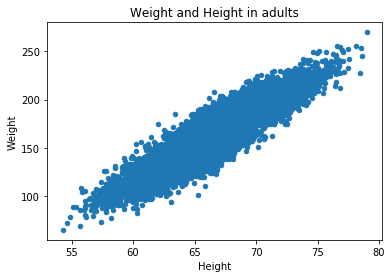

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

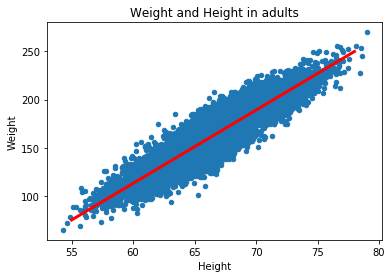

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

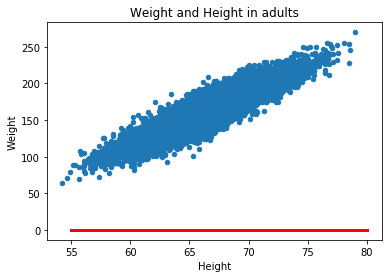

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5, 0, 'b')

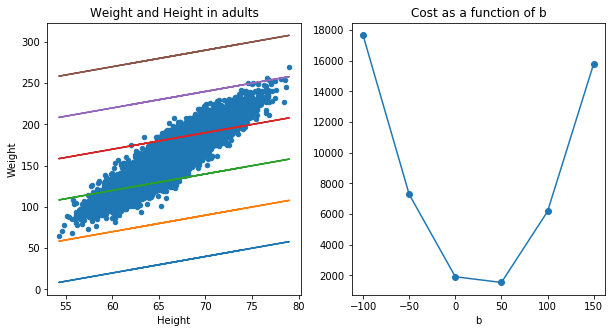

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [25]:
model = Sequential()

In [26]:
model.add(Dense(1, input_shape=(1,)))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [29]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 8s 849us/step - loss: 791.8016
Epoch 2/40
10000/10000 [==============================] - 0s 38us/step - loss: 547.3228
Epoch 3/40
10000/10000 [==============================] - 0s 37us/step - loss: 508.2742
Epoch 4/40
10000/10000 [==============================] - 0s 35us/step - loss: 463.5588
Epoch 5/40
10000/10000 [==============================] - 0s 38us/step - loss: 425.8694
Epoch 6/40
10000/10000 [==============================] - 0s 37us/step - loss: 382.9960
Epoch 7/40
10000/10000 [==============================] - 0s 37us/step - loss: 350.1805
Epoch 8/40
10000/10000 [==============================] - 0s 35us/step - loss: 310.3518
Epoch 9/40
10000/10000 [==============================] - 0s 37us/step - loss: 280.0351
Epoch 10/40
10000/10000 [==============================] - 0s 38us/step - loss: 262.7558
Epoch 11/40
10000/10000 [==============================] - 0s 39us/step - loss: 260.5282
Epoch 12/40
10000/10000 [====

In [30]:
y_pred = model.predict(X)

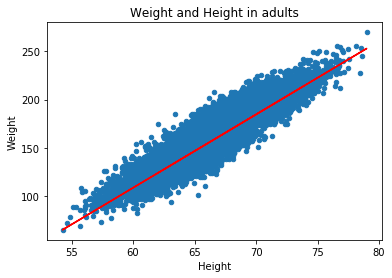

In [31]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [32]:
W, B = model.get_weights()

In [33]:
W

array([[7.616127]], dtype=float32)

In [34]:
B

array([-348.51498], dtype=float32)

## Evaluating Model Performance

In [36]:
from sklearn.metrics import r2_score

In [37]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.835


### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [40]:
len(X_train)

8000

In [41]:
len(X_test)

2000

In [42]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [43]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [44]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [45]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	151.7
The Mean Squared Error on the Test set is:	157.0


In [47]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.854
The R2 score on the Test set is:	0.841


# Classification

In [48]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [49]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


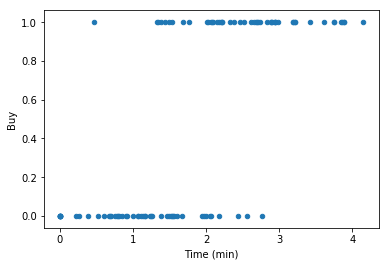

In [50]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [51]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [52]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [54]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 0.6621 - acc: 0.5300
Epoch 2/25
100/100 [==============================] - 0s 143us/step - loss: 0.6065 - acc: 0.6100
Epoch 3/25
100/100 [==============================] - 0s 137us/step - loss: 0.5651 - acc: 0.7000
Epoch 4/25
100/100 [==============================] - 0s 97us/step - loss: 0.5458 - acc: 0.7000
Epoch 5/25
100/100 [==============================] - 0s 94us/step - loss: 0.5274 - acc: 0.7900
Epoch 6/25
100/100 [==============================] - 0s 84us/step - loss: 0.5047 - acc: 0.7900
Epoch 7/25
100/100 [==============================] - 0s 95us/step - loss: 0.4955 - acc: 0.8000
Epoch 8/25
100/100 [==============================] - 0s 134us/step - loss: 0.4840 - acc: 0.7900
Epoch 9/25
100/100 [==============================] - 0s 109us/step - loss: 0.4772 - acc: 0.7500
Epoch 10/25
100/100 [==============================] - 0s 81us/step - loss: 0.4650 - acc: 0.8300
Epoch 11/25
100/100 [===============

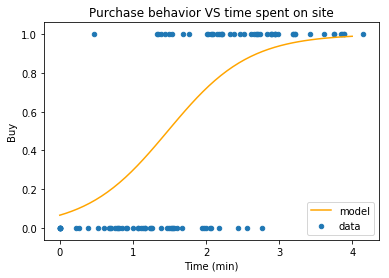

In [55]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [56]:
temp_class = model.predict(temp) > 0.5

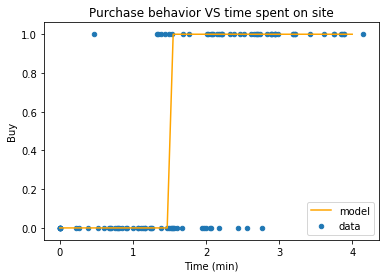

In [57]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [58]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.790


### Train/Test split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [63]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [64]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [65]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.825
The test accuracy score is 0.850


## Cross Validation

In [67]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [68]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [69]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [70]:
from sklearn.model_selection import cross_val_score, KFold

In [71]:
cv = KFold(3, shuffle=True)

In [72]:
scores = cross_val_score(model, X, y, cv=cv)

In [73]:
scores

array([0.67647059, 0.78787879, 0.66666667])

In [74]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7103 ± 0.0550


## Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y, y_class_pred)

array([[34, 16],
       [ 5, 45]])

In [77]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [78]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,34,16
Buy,5,45


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [80]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.738
Recall:  	0.900
F1 Score:	0.811


In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.74      0.90      0.81        50

   micro avg       0.79      0.79      0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



## Feature Preprocessing

### Categorical Features

In [83]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [84]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [85]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [86]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [87]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [88]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [89]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


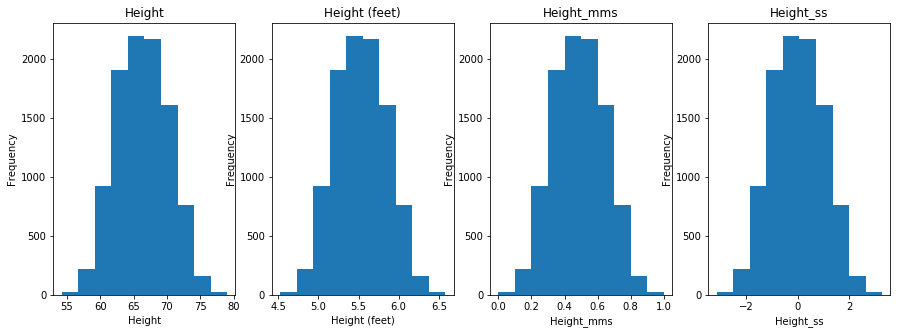

In [90]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [114]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [99]:
import pandas as pd 
data = pd.read_csv('../data/housing-data.csv')
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [106]:
X = data[['sqft','bdrms','age']].values
Y = data['price'].values
print (X.shape, Y.shape)

(47, 3) (47,)


In [159]:
def regressionModel():
    model = keras.models.Sequential()
    model.add(Dense(units=1, input_dim=3))
    model.compile(Adam(lr=0.1), loss='mean_squared_error', metrics=['accuracy'])
    model.summary()
    return model

In [160]:
model = KerasRegressor(build_fn=regressionModel)
hist = model.fit(X, Y, epochs=100, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 0s 9ms/step - loss: 129596073330.3830 - acc: 0.0000e+00
Epoch 2/100
47/47 [==============================] - 0s 329us/step - loss: 129332519086.2979 - acc: 0.0000e+00
Epoch 3/100
47/47 [==============================] - 0s 182us/step - loss: 129042495793.0213 - acc: 0.0000e+00
Epoch 4/100
47/47 [==============================] - 0s 100us/step - loss: 128758858250.8936 - acc: 0.0000e+00
Epoch 5/100
47/47 [==============================] - 0s 187us/step - loss: 128458085833.5319 - acc: 0.0000e+00
Epoch 6/100
47/47 [==============================] - 0s 103us/step - loss: 128147203442.3830 - acc: 0.0000e+00
Epoch 7/100


47/47 [==============================] - 0s 215us/step - loss: 109522713926.8085 - acc: 0.0000e+00
Epoch 71/100
47/47 [==============================] - 0s 127us/step - loss: 109260910504.8511 - acc: 0.0000e+00
Epoch 72/100
47/47 [==============================] - 0s 105us/step - loss: 108985263125.7872 - acc: 0.0000e+00
Epoch 73/100
47/47 [==============================] - 0s 120us/step - loss: 108703637329.7021 - acc: 0.0000e+00
Epoch 74/100
47/47 [==============================] - 0s 228us/step - loss: 108437109738.2128 - acc: 0.0000e+00
Epoch 75/100
47/47 [==============================] - 0s 113us/step - loss: 108180227965.2766 - acc: 0.0000e+00
Epoch 76/100
47/47 [==============================] - 0s 105us/step - loss: 107909655268.7660 - acc: 0.0000e+00
Epoch 77/100
47/47 [==============================] - 0s 103us/step - loss: 107641632898.7234 - acc: 0.0000e+00
Epoch 78/100
47/47 [==============================] - 0s 138us/step - loss: 107366785721.1915 - acc: 0.0000e+00
Epoch

In [161]:
print (hist.history)

{'loss': [129596073330.38298, 129332519086.29787, 129042495793.02127, 128758858250.89362, 128458085833.53192, 128147203442.38298, 127825573495.82979, 127551038311.48936, 127235537723.91489, 126932822408.17021, 126627873116.59575, 126314132763.23404, 126012296605.95744, 125704445777.70213, 125408774013.2766, 125094966555.23404, 124787410987.57446, 124493129422.97873, 124170752087.14894, 123883496469.78723, 123570608955.91489, 123275641703.48936, 122979980048.34042, 122659682260.42554, 122367234135.14894, 122078343255.14894, 121771940319.31915, 121477657708.93617, 121180965779.06383, 120890299500.93617, 120599102485.78723, 120294523402.89362, 120015281478.80852, 119710550059.57446, 119436918958.29787, 119133779750.12766, 118852759639.14894, 118558349965.61702, 118277971793.70213, 117990942589.2766, 117699754463.31915, 117398475884.93617, 117128554190.97873, 116844569098.89362, 116538665177.87234, 116268357065.53192, 115987643021.61702, 115701630322.38298, 115408884670.63829, 115128931436

In [173]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data['sqft_ss'] = ss.fit_transform(data[['sqft']])
data['bdrms_ss'] = ss.fit_transform(data[['bdrms']])
data['age_ss'] = ss.fit_transform(data[['age']])
data['price_ss'] = ss.fit_transform(data[['price']])

/home/ankdesh/virtualenvs/kaggle-google-doodle/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ankdesh/virtualenvs/kaggle-google-doodle/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ankdesh/virtualenvs/kaggle-google-doodle/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ankdesh/virtualenvs/kaggle-google-doodle/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ankdesh/virtualenvs/ka

In [174]:
X_ss = data[['sqft_ss','bdrms_ss','age_ss']].values
Y_ss = data['price_ss'].values
print (X_ss.shape, Y_ss.shape)

(47, 3) (47,)


In [175]:
data.describe().round(2)

,sqft,bdrms,age,price,sqft_ss,bdrms_ss,age_ss,price_ss
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,0.00,0.00,0.00,-0.00
std,794.70,0.76,22.87,125039.90,1.01,1.01,1.01,1.01
min,852.00,1.00,5.00,169900.00,-1.46,-2.88,-1.67,-1.38
25%,1432.00,3.00,24.50,249900.00,-0.72,-0.23,-0.81,-0.73
50%,1888.00,3.00,44.00,299900.00,-0.14,-0.23,0.06,-0.33
75%,2269.00,4.00,61.50,384450.00,0.34,1.10,0.83,0.36
max,4478.00,5.00,79.00,699900.00,3.15,2.43,1.60,2.91


In [180]:
def regressionModel():
    model = keras.models.Sequential()
    model.add(Dense(units=1, input_dim=3))
    model.compile(Adam(lr=0.1), loss='mean_squared_error')
    model.summary()
    return model

In [181]:
model = KerasRegressor(build_fn=regressionModel)
hist = model.fit(X_ss, Y_ss, epochs=100, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 0s 10ms/step - loss: 0.9250 - acc: 0.0000e+00
Epoch 2/100
47/47 [==============================] - 0s 120us/step - loss: 0.6575 - acc: 0.0000e+00
Epoch 3/100
47/47 [==============================] - 0s 105us/step - loss: 0.4468 - acc: 0.0000e+00
Epoch 4/100
47/47 [==============================] - 0s 115us/step - loss: 0.3290 - acc: 0.0000e+00
Epoch 5/100
47/47 [==============================] - 0s 167us/step - loss: 0.2967 - acc: 0.0000e+00
Epoch 6/100
47/47 [==============================] - 0s 115us/step - loss: 0.2948 - acc: 0.0000e+00
Epoch 7/100
47/47 [==============================] - 0s 112us/step - loss: 0.

47/47 [==============================] - 0s 104us/step - loss: 0.2714 - acc: 0.0000e+00
Epoch 78/100
47/47 [==============================] - 0s 112us/step - loss: 0.2705 - acc: 0.0000e+00
Epoch 79/100
47/47 [==============================] - 0s 120us/step - loss: 0.2725 - acc: 0.0000e+00
Epoch 80/100
47/47 [==============================] - 0s 128us/step - loss: 0.2729 - acc: 0.0000e+00
Epoch 81/100
47/47 [==============================] - 0s 184us/step - loss: 0.2716 - acc: 0.0000e+00
Epoch 82/100
47/47 [==============================] - 0s 111us/step - loss: 0.2712 - acc: 0.0000e+00
Epoch 83/100
47/47 [==============================] - 0s 223us/step - loss: 0.2689 - acc: 0.0000e+00
Epoch 84/100
47/47 [==============================] - 0s 117us/step - loss: 0.2680 - acc: 0.0000e+00
Epoch 85/100
47/47 [==============================] - 0s 138us/step - loss: 0.2708 - acc: 0.0000e+00
Epoch 86/100
47/47 [==============================] - 0s 126us/step - loss: 0.2749 - acc: 0.0000e+00
Epo

In [183]:
y_pred = model.predict(X_ss)

In [184]:
print (r2_score(Y_ss,y_pred))

0.7232747662942677


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [188]:
dataset = pd.read_csv('../data/HR_comma_sep.csv')
print (dataset.describe())
print (dataset.info())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [189]:
print (dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [191]:
print (dataset['sales'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [194]:
print (dataset['salary'].unique())

['low' 'medium' 'high']


In [196]:
print (dataset['left'].unique())

[1 0]


In [199]:
df_dummies = pd.get_dummies(dataset[['sales', 'salary']])

In [202]:
dataset['average_montly_hours_100'] = dataset['average_montly_hours']/100.0

In [203]:
X = pd.concat([dataset[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = dataset['left'].values

In [205]:
print (X.shape, y.shape)

(14999, 20) (14999,)


In [223]:
def hrModel():
    model = keras.models.Sequential()
    model.add(Dense(units=100, input_shape=(20,), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(Adam(lr=0.1), loss='binary_crossentropy',metrics = ['accuracy'])
    model.summary()
    return model

In [224]:
model = KerasClassifier(build_fn=hrModel)

In [225]:
from sklearn.model_selection import KFold, cross_val_score

In [226]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
3000/3000 [==============================] - 0s 108us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 101       
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
Epo